## Background

ADHD, also known as Attention-deficit/hyperactivity disorder (formerly also ADD) is a mental disorder that often goes undiagnosed in those it afflicts. It is also often mischaracterized as a disorder that 'just' makes kids rowdy. But it should be known that many adults are undiagnosed and it can greatly affect quality of life in all people.

Symptoms are characterized under two types:


### Inattentive Type

* Doesn’t pay close attention to details or makes careless mistakes in school or job tasks.
* Has problems staying focused on tasks or activities, such as during lectures, conversations or long reading.
* Does not seem to listen when spoken to (i.e., seems to be elsewhere).
* Does not follow through on instructions and doesn’t complete schoolwork, chores or job duties (may start tasks but quickly loses focus).
* Has problems organizing tasks and work (for instance, does not manage time well; has messy, disorganized work; misses deadlines).
* Avoids or dislikes tasks that require sustained mental effort, such as preparing reports and completing forms.
* Often loses things needed for tasks or daily life, such as school papers, books, keys, wallet, cell phone and eyeglasses.
* Is easily distracted.
* Forgets daily tasks, such as doing chores and running errands. Older teens and adults may forget to return phone calls, pay bills and keep appointments.


### Hyperactive/Impulsive Type

* Fidgets with or taps hands or feet, or squirms in seat.
* Not able to stay seated (in classroom, workplace).
* Runs about or climbs where it is inappropriate.
* Unable to play or do leisure activities quietly.
* Always “on the go,” as if driven by a motor.
* Talks too much.
* Blurts out an answer before a question has been finished (for instance may finish people’s sentences, can’t wait to speak in conversations).
* Has difficulty waiting for his or her turn, such as while waiting in line.
* Interrupts or intrudes on others (for instance, cuts into conversations, games or activities, or starts using other people’s things without permission). Older teens and adults may take over what others are doing.

## Objective

The objective of this project is to use machine learning to get a better idea of the demographics of those who get diagnosed with ADHD. We also want to gauge how likely somebody is to get diagnosed with ADHD.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

C:\Users\goober\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('dataset/adhd_data.csv')

df.head()

,age,sex,specify,home_language,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,if_yes_please_list_these_difficulties_and_or_symptoms,if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started,have_you_ever_been_diagnosed_with_a_mental_illness,if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses,was_this_diagnosis_made_before_or_after_you_left_high_school,...,bai1_item_15,bai1_item_16,bai1_item_17,bai1_item_18,bai1_item_19,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change
0,22,female,NaN,xitsonga,no,na,na,no,na,not applicable,...,0,0,3,1,3,1,3,44,44.0,-0.112652
1,21,male,NaN,english,no,none,none,no,none,not applicable,...,0,0,0,0,0,1,0,6,6.0,NaN
2,19,female,NaN,isizulu,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,...,0,0,1,0,0,0,2,28,29.0,NaN
3,20,male,NaN,afrikaans/english,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,...,1,2,1,1,0,1,2,23,23.0,-2.244203
4,20,female,NaN,isixhosa,no,none,none,no,NaN,not applicable,...,0,3,1,1,0,1,0,12,12.0,NaN


In [3]:
print(df.shape)

(506, 110)


In [4]:
print(df.describe)

<bound method NDFrame.describe of      age     sex specify      home_language  \
0     22  female     NaN           xitsonga   
1     21    male     NaN            english   
2     19  female     NaN            isizulu   
3     20    male     NaN  afrikaans/english   
4     20  female     NaN           isixhosa   
..   ...     ...     ...                ...   
501   18  female     NaN            english   
502   18  female     NaN           isixhosa   
503   18  female     NaN            english   
504   18  female     NaN            english   
505   18  female     NaN            english   

    have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school  \
0                                                   no                                                                              
1                                                   no                                                                              
2 

In [5]:
column_renaming = {"home_language": "native_language",
                  "have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school": "preuniversity_symptomatic",
                  "if_yes_please_list_these_difficulties_and_or_symptoms": "preuniversity_symptoms",
                  "if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started": "preuniversity_symptom_age",
                  "have_you_ever_been_diagnosed_with_a_mental_illness": "mental_disorder_diagnosed_bool",
                  "if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses": "listed_diagnosed_disorders",
                  "was_this_diagnosis_made_before_or_after_you_left_high_school": "preuniversity_diagnosed_bool",
                  "if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this": "preuniversity_diagnosed_age",
                  "have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one": "previously_medicated",
                  "are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one": "currently_medicated",
                  "have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one": "previously_counseled",
                  "are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one": "currently_counseled"}

df.rename(columns = column_renaming, inplace = True)


print(df.columns.values)
df.head()

['age' 'sex' 'specify' 'native_language' 'preuniversity_symptomatic'
 'preuniversity_symptoms' 'preuniversity_symptom_age'
 'mental_disorder_diagnosed_bool' 'listed_diagnosed_disorders'
 'preuniversity_diagnosed_bool' 'preuniversity_diagnosed_age'
 'previously_medicated' 'currently_medicated' 'previously_counseled'
 'currently_counseled' 'bdi1_item_1' 'bdi1_item_2' 'bdi1_item_3'
 'bdi1_item_4' 'bdi1_item_5' 'bdi1_item_6' 'bdi1_item_7' 'bdi1_item_8'
 'bdi1_item_9' 'bdi1_item_10' 'bdi1_item_11' 'bdi1_item_12' 'bdi1_item_13'
 'bdi1_item_14' 'bdi1_item_15' 'bdi1_item_16' 'bdi1_item_17'
 'bdi1_item_18' 'bdi1_item_19' 'bdi1_item_20' 'bdi1_item_21' 'bdi1_total'
 'audit1_item_1' 'audit1_item_2' 'audit1_item_3' 'audit1_item_4'
 'audit1_item_5' 'audit1_item_6' 'audit1_item_7' 'audit1_item_8'
 'audit1_item_9' 'audit1_total' 'aas1_item_1' 'aas1_item_2' 'aas1_item_3'
 'aas1_item_4' 'aas1_item_5' 'aas1_item_6' 'aas1_item_7' 'aas1_item_8'
 'aas1_item_9' 'aas1_total' 'psy1004_grade' 'nbt_completed' 'n

,age,sex,specify,native_language,preuniversity_symptomatic,preuniversity_symptoms,preuniversity_symptom_age,mental_disorder_diagnosed_bool,listed_diagnosed_disorders,preuniversity_diagnosed_bool,...,bai1_item_15,bai1_item_16,bai1_item_17,bai1_item_18,bai1_item_19,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change
0,22,female,NaN,xitsonga,no,na,na,no,na,not applicable,...,0,0,3,1,3,1,3,44,44.0,-0.112652
1,21,male,NaN,english,no,none,none,no,none,not applicable,...,0,0,0,0,0,1,0,6,6.0,NaN
2,19,female,NaN,isizulu,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,...,0,0,1,0,0,0,2,28,29.0,NaN
3,20,male,NaN,afrikaans/english,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,...,1,2,1,1,0,1,2,23,23.0,-2.244203
4,20,female,NaN,isixhosa,no,none,none,no,NaN,not applicable,...,0,3,1,1,0,1,0,12,12.0,NaN


## Column and Data Explanations

* Age - a subject's age in years
* Sex - a subject's identified gender/sex
* Native Language - a subject's native language
* Preuniversity Symptomatic - mental health difficulties or symptoms shown before university
* Preuniversity Symptoms - list of symptoms shown before university
* Preuniversity Symptom Age - age when first started showing mental disorder symptoms
* Mental Disorder Diagnosed - has been diagnosed with a mental disorder
* Listed Diagnosed Disorders - list of disorders that subject has been diagnosed with
* Preuniversity Diagnosed Bool - was diagnosed before university
* Preuniversity Diagnosed Age - age when diagnosed with mental disorder
* Previously Medicated - has been medicated for given mental disorders/symptoms
* Currently Medicated - currently medicated for given mental disorders/symptoms
* Previously Counseled - has went to a therapist or counselor for mental health struggles in the past
* Currently Counseled - currently goes to a therapist or counselor for mental health

### The rest of the column items are related to different tests/examinations that a subject may have taken
* Beck's Depression Inventory (BDI) - A series of questions that gauges a subjects level of depression
* Alcohol Use Disorders Identification Test (AUDIT) - A series of questions to assess alcohol related problems
* National Benchmark Test (NBT) - An assessment similar to the SAT/ACT
* ADHD Self-Report Scale (ASRS) - A questionaire that gauges a subject's report of ADHD symptoms
* Beck Anxiety Index (BAI) - A series of questions that gauges a subject's level of anxiety

In [6]:
print( ((df.isnull().sum() / len(df)) * 100).round(2) )

age                           0.00
sex                           0.00
specify                      97.83
native_language               0.00
preuniversity_symptomatic     0.00
                             ...  
bai1_item_20                  0.00
bai1_item_21                  0.00
bai1_total                    0.00
asrs1_total.y                 0.20
aas_change                   65.22
Length: 110, dtype: float64


In [7]:
n_dupes = df.duplicated().sum()
print("number of duplicate rows are: %i" %n_dupes)

number of duplicate rows are: 0


### More Data Wrangling

In [8]:
#grouping all cases where subjects said they never experienced any difficulties
# answered_none_diff = ['na', 'none', 'n/a', 'not applicable', '/', 'n.a', '-']

# c1 = df['preuniversity_symptoms'] in answered_none_diff
# df['number_symptoms'] = np.where(c1, 0, 1)


#creating our target column
answered_possible_diff_diag = ['yes, formally diagnosed by a doctor or mental health professional', 'not formally diagnosed']

def has_adhd(x):
    answered_none_diff = ['na', 'none', 'n/a', 'not applicable', '/', 'n.a', '-', 'nan', 'not diagnosed']
    
    if type(x) == 'float':
        return 0
    
    if 'adhd' in str(x).split(' '):
        return 1 #suspected to have adhd
    elif str(x) not in answered_none_diff and not None:
        return 1 ##possibly has other disorder
    return 0 #suspected to not have a disorder

df['has_adhd'] = df['listed_diagnosed_disorders'].apply(has_adhd)

## Model Explanation

Our target for our model is will have two classifications. We want to see whether someone will be diagnosed AND with ADHD. ADHD can be linked to other mental disorders. The column we want to target doesn't exist in our dataset, but is dependent on two of the columns we do have -- mental_disordered_diagnosed_bool and listed_diagnosed_disorders.

The classifications will be : undiagnosed (likely ADHD), undiagnosed (other disorder), and undiagnosed (unlikely)

The distinction between being diagnosed with ADHD and being diagnosed with things besides ADHD is there to bring attention to other mental disorders and mental health struggles.

Another important note : being undiagnosed does NOT necessarily mean that a person is free from mental health struggles, in fact, they may be most at risk, untreated and undiagnosed mental health struggles can lead to more dangerous behaviors.

## Feature Selection and Engineering

Columns that we will include in some capacity:
* Sex
* Native Language
* Preuniversity Symptoms
* Number of Preuniversity Symptoms
* Previously Counseled
* Currently Counseled
* EACH individual question of the BDI
* EACH individual question of the AUDIT
* EACH individual question of the ASRS
* EACH individual question of the BAI

If you wanted to decrease dimensions for the model to be quicker -- you could take the total values of the test results instead of using each individual question, but the weight of each question would be equal.

In [9]:
df = pd.get_dummies(df, columns = ['sex', 'preuniversity_symptomatic', 'currently_counseled', 'previously_counseled'], drop_first = True)

In [10]:
print(df.columns.values)
df.head()

['age' 'specify' 'native_language' 'preuniversity_symptoms'
 'preuniversity_symptom_age' 'mental_disorder_diagnosed_bool'
 'listed_diagnosed_disorders' 'preuniversity_diagnosed_bool'
 'preuniversity_diagnosed_age' 'previously_medicated'
 'currently_medicated' 'bdi1_item_1' 'bdi1_item_2' 'bdi1_item_3'
 'bdi1_item_4' 'bdi1_item_5' 'bdi1_item_6' 'bdi1_item_7' 'bdi1_item_8'
 'bdi1_item_9' 'bdi1_item_10' 'bdi1_item_11' 'bdi1_item_12' 'bdi1_item_13'
 'bdi1_item_14' 'bdi1_item_15' 'bdi1_item_16' 'bdi1_item_17'
 'bdi1_item_18' 'bdi1_item_19' 'bdi1_item_20' 'bdi1_item_21' 'bdi1_total'
 'audit1_item_1' 'audit1_item_2' 'audit1_item_3' 'audit1_item_4'
 'audit1_item_5' 'audit1_item_6' 'audit1_item_7' 'audit1_item_8'
 'audit1_item_9' 'audit1_total' 'aas1_item_1' 'aas1_item_2' 'aas1_item_3'
 'aas1_item_4' 'aas1_item_5' 'aas1_item_6' 'aas1_item_7' 'aas1_item_8'
 'aas1_item_9' 'aas1_total' 'psy1004_grade' 'nbt_completed' 'nbt_year'
 'nbt_al' 'nbt_math' 'nbt_ql' 'nbt_ave' 'nbt_did_math' 'nbt_alql_ave'
 

,age,specify,native_language,preuniversity_symptoms,preuniversity_symptom_age,mental_disorder_diagnosed_bool,listed_diagnosed_disorders,preuniversity_diagnosed_bool,preuniversity_diagnosed_age,previously_medicated,...,asrs1_total.y,aas_change,has_adhd,sex_male,sex_other,preuniversity_symptomatic_yes,currently_counseled_not applicable,currently_counseled_yes,previously_counseled_not applicable,previously_counseled_yes
0,22,NaN,xitsonga,na,na,no,na,not applicable,na,not applicable,...,44.0,-0.112652,0,0,0,0,1,0,1,0
1,21,NaN,english,none,none,no,none,not applicable,none,not applicable,...,6.0,NaN,0,1,0,0,1,0,1,0
2,19,NaN,isizulu,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,14,yes,...,29.0,NaN,1,0,0,1,0,0,0,0
3,20,NaN,afrikaans/english,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,18,yes,...,23.0,-2.244203,1,1,0,1,0,1,0,1
4,20,NaN,isixhosa,none,none,no,NaN,not applicable,NaN,no,...,12.0,NaN,0,0,0,0,0,0,0,0


In [11]:
features = ['sex_male', 'sex_other', 'preuniversity_symptomatic_yes', 'currently_counseled_not applicable' , 'currently_counseled_yes', 'previously_counseled_not applicable', 'previously_counseled_yes']

def questionnaire_column_add(test_name, end):
    for num in range(1, end):
        col_name = test_name + "1_item_" + str(num)
        features.append(col_name)

questionnaire_column_add('bdi', 22)
questionnaire_column_add('audit', 10)
questionnaire_column_add('asrs', 19)
# questionnaire_column_add('bai', 22)
        
# for bdi_num in range(1,22):
#     col_name = "bdi1_item_" + str(bdi_num)
    
#     features.append(col_name)
    
# for audit_num in range(1, 10):
#     col_name = "audit1_item_" + str(audit_num)
    
#     features.append()
print(features)

['sex_male', 'sex_other', 'preuniversity_symptomatic_yes', 'currently_counseled_not applicable', 'currently_counseled_yes', 'previously_counseled_not applicable', 'previously_counseled_yes', 'bdi1_item_1', 'bdi1_item_2', 'bdi1_item_3', 'bdi1_item_4', 'bdi1_item_5', 'bdi1_item_6', 'bdi1_item_7', 'bdi1_item_8', 'bdi1_item_9', 'bdi1_item_10', 'bdi1_item_11', 'bdi1_item_12', 'bdi1_item_13', 'bdi1_item_14', 'bdi1_item_15', 'bdi1_item_16', 'bdi1_item_17', 'bdi1_item_18', 'bdi1_item_19', 'bdi1_item_20', 'bdi1_item_21', 'audit1_item_1', 'audit1_item_2', 'audit1_item_3', 'audit1_item_4', 'audit1_item_5', 'audit1_item_6', 'audit1_item_7', 'audit1_item_8', 'audit1_item_9', 'asrs1_item_1', 'asrs1_item_2', 'asrs1_item_3', 'asrs1_item_4', 'asrs1_item_5', 'asrs1_item_6', 'asrs1_item_7', 'asrs1_item_8', 'asrs1_item_9', 'asrs1_item_10', 'asrs1_item_11', 'asrs1_item_12', 'asrs1_item_13', 'asrs1_item_14', 'asrs1_item_15', 'asrs1_item_16', 'asrs1_item_17', 'asrs1_item_18']


In [12]:
X = df[features]
y = df['has_adhd']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

print(X_train.shape)
print(X_test.shape)

(404, 55)
(102, 55)


In [14]:
model = LogisticRegression(max_iter = 7000).fit(X_train,y_train)
print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=7000)

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [17]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba.round(2)

array([0.57, 0.49, 0.13, 0.75, 0.52, 0.98, 0.45, 0.98, 0.48, 0.06, 0.86,
       0.13, 0.36, 0.9 , 0.95, 0.95, 0.76, 0.86, 0.95, 0.44, 0.6 , 0.73,
       0.54, 0.46, 0.7 , 0.58, 0.5 , 0.84, 0.67, 0.5 , 0.8 , 0.18, 0.48,
       0.91, 0.43, 0.64, 0.03, 0.43, 0.47, 0.94, 0.83, 0.07, 0.87, 0.77,
       0.76, 0.18, 0.06, 0.9 , 0.84, 0.18, 0.95, 0.56, 0.65, 0.31, 0.9 ,
       0.55, 0.86, 0.28, 0.65, 0.27, 0.05, 0.64, 0.11, 0.69, 0.59, 0.47,
       0.98, 0.76, 0.94, 0.15, 0.94, 0.33, 0.13, 0.88, 0.19, 0.46, 0.95,
       0.27, 0.28, 0.72, 0.26, 0.76, 0.9 , 0.94, 0.69, 0.62, 0.74, 0.64,
       0.83, 0.2 , 0.95, 0.93, 0.27, 0.33, 0.37, 0.83, 0.27, 0.7 , 0.58,
       0.14, 0.64, 0.56])

In [18]:
pred_df = pd.DataFrame.from_dict( {'y_true': y_test, 'y_pred': y_pred, 'probability': y_pred_proba} )
pred_df

,y_true,y_pred,probability
48,1,1,0.568130
64,1,0,0.486693
473,0,0,0.134651
485,1,1,0.753983
228,1,1,0.520052
...,...,...,...
411,1,1,0.697242
300,1,1,0.580121
69,0,0,0.142775
73,0,1,0.639793


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7647058823529411


In [20]:
recall = recall_score(y_test, y_pred)
print(recall)

0.8166666666666667


In [21]:
precision = precision_score(y_test, y_pred)
print(precision)

0.7903225806451613


In [22]:
f1_score(y_test, y_pred)

0.8032786885245902

true-negitive: 29 
false-positive: 13 
false-negative: 11 
true-positive: 49


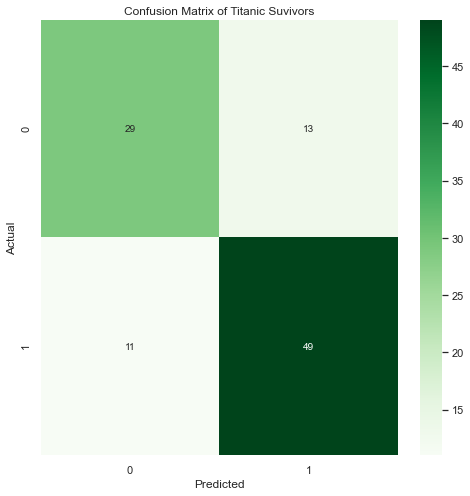

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

## Improvements and Comments

* As stated earlier, if you wish to decrease feature count of the model for speed, you can take total scores from assessments instead of each individual question, at the cost of weighing each question separately
* Being able to parse through individual symptoms would provide better insight into possibility of mental disorders and increase the amount of viable features - would require more data cleaning to classify symptoms
* The data is biased towards a specific demographic, specifically South African first-year university students. The culture of acceptance for mental disorders and mental health struggles is very different in different countries.
* Some subjects were already being medicated for specific mental disorders, and filled out the questionnaire while under medications that would affect symptoms. (e.g somebody taking medication for depression filled out the BDI questions with answers that didn't take into account their past symptoms)
* Model improved from 61% to 75%